In [1]:
import requests
from PIL import Image
from io import BytesIO
import os
import pandas as pd
from datetime import datetime
import numpy as np
import time

In [ ]:
am_path = '/Sample Data/'
am_filename = 'wabmines_GDA2020.csv'
am_labels = pd.read_csv(am_path+am_filename)
# display(am_labels)
am_labels2 = am_labels[['SITE_CODE','SITE_TYPE','SITE_SUB_T','LATITUDE','LONGITUDE']].copy()
am_labels2['Stage'] = 'Abandoned'
am_labels2['Stage2'] = 'Abandoned'

display(am_labels2)
am_labels2  = am_labels2.rename(columns =  {  'SITE_CODE':	'SiteCode',
                                            'SITE_TYPE': 'Type',
                                            'SITE_SUB_T': 'SubType',
                                            'LATITUDE': 'Latitude',
                                            'LONGITUDE':'Longitude'})
am_labels2 = am_labels2[['SiteCode','Type','SubType','Stage','Latitude','Longitude','Stage2']]
print(am_labels2.columns)

C:\Users\afrob\AppData\Local\Temp\ipykernel_40936\338196387.py:3: DtypeWarning: Columns (11,12,13,33) have mixed types. Specify dtype option on import or set low_memory=False.
  am_labels = pd.read_csv(am_path+am_filename)


,SITE_CODE,SITE_TYPE,SITE_SUB_T,LATITUDE,LONGITUDE,Stage,Stage2
0,S0130958,Other,Unspecified,-26.629076,120.23838,Abandoned,Abandoned
1,S0130959,Other,Unspecified,-26.629406,120.23806,Abandoned,Abandoned
2,S0130960,Mine,Shaft,-27.428387,117.86653,Abandoned,Abandoned
3,S0130961,Other,Unspecified,-26.629566,120.23805,Abandoned,Abandoned
4,S0130962,Other,Unspecified,-26.629706,120.23825,Abandoned,Abandoned
...,...,...,...,...,...,...,...
192518,S0213398,Mine,Shallow workings,-29.944867,121.11649,Abandoned,Abandoned
192519,S0213683,Mine,Shallow workings,-30.912316,121.19396,Abandoned,Abandoned
192520,S0213684,Mine,Shaft,-29.952157,121.12905,Abandoned,Abandoned
192521,S0213685,Mine,Shaft,-29.952227,121.12891,Abandoned,Abandoned


Index(['SiteCode', 'Type', 'SubType', 'Stage', 'Latitude', 'Longitude',
       'Stage2'],
      dtype='object')


In [ ]:
act_path = '/Sample Data/'
act_filename = 'Sites.csv'
act_labels = pd.read_csv(act_path+act_filename)
# display(act_labels)
act_labels = act_labels[['SiteCode','Type','SubType','Stage','Latitude','Longitude']]
act_labels['Stage2'] = 'Active'
display(act_labels)

,SiteCode,Type,SubType,Stage,Latitude,Longitude,Stage2
0,S0000001,Mine,Openpit,Care and Maintenance,-28.565078,122.480754,Active
1,S0000002,Deposit,Unspecified,Undeveloped,-26.787357,118.574415,Active
2,S0000002,Deposit,Unspecified,Undeveloped,-26.787357,118.574415,Active
3,S0000005,Mine,Openpit,Shut,-29.690617,121.012812,Active
4,S0000006,Mine,Openpit,Shut,-30.239138,121.222793,Active
...,...,...,...,...,...,...,...
47090,S0244127,Mine,Openpit,Shut,-30.380134,121.054678,Active
47091,S0244128,Infrastructure,Dump (waste),Shut,-30.378254,121.056179,Active
47092,S0244129,Infrastructure,Dump (waste),Shut,-30.380064,121.058075,Active
47093,S0244130,Prospect,Drillhole,Undeveloped,-28.675087,117.610910,Active


In [4]:
MineLabels = pd.concat((am_labels2,act_labels))
MineLabels = MineLabels.reset_index(drop=True)
display(MineLabels)


,SiteCode,Type,SubType,Stage,Latitude,Longitude,Stage2
0,S0130958,Other,Unspecified,Abandoned,-26.629076,120.238380,Abandoned
1,S0130959,Other,Unspecified,Abandoned,-26.629406,120.238060,Abandoned
2,S0130960,Mine,Shaft,Abandoned,-27.428387,117.866530,Abandoned
3,S0130961,Other,Unspecified,Abandoned,-26.629566,120.238050,Abandoned
4,S0130962,Other,Unspecified,Abandoned,-26.629706,120.238250,Abandoned
...,...,...,...,...,...,...,...
239613,S0244127,Mine,Openpit,Shut,-30.380134,121.054678,Active
239614,S0244128,Infrastructure,Dump (waste),Shut,-30.378254,121.056179,Active
239615,S0244129,Infrastructure,Dump (waste),Shut,-30.380064,121.058075,Active
239616,S0244130,Prospect,Drillhole,Undeveloped,-28.675087,117.610910,Active


In [ ]:
Bound = float(5000/111139)

LatTest1 = -30.67400
LatTest2 = LatTest1+Bound

LongTest1 = 121.07200
LongTest2 = LongTest1+Bound

print(LatTest1,LongTest1,LatTest2,LongTest2)
# print(am_labels[(am_labels['LATITUDE'] >= LatTest1) &
#                 (am_labels['LATITUDE'] <= LatTest2) &
#                 (am_labels['LONGITUDE'] <= LongTest1) &
#                 (am_labels['LONGITUDE'] >= LongTest2)] )
am_select = am_labels[(am_labels['LATITUDE'] >= LatTest1) &
                (am_labels['LATITUDE'] <= LatTest2) &
                (am_labels['LONGITUDE'] >= LongTest1) &
                (am_labels['LONGITUDE'] <= LongTest2)] 



(239618, 7)
(239266, 7)


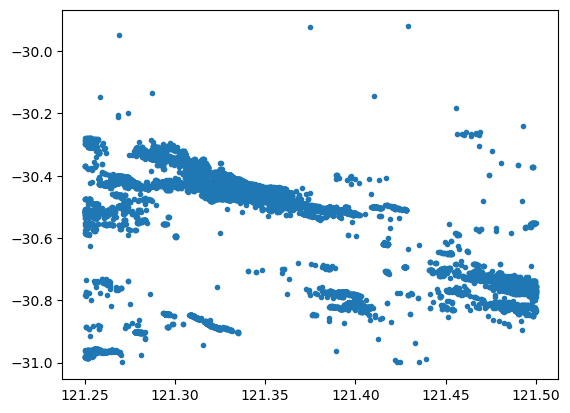

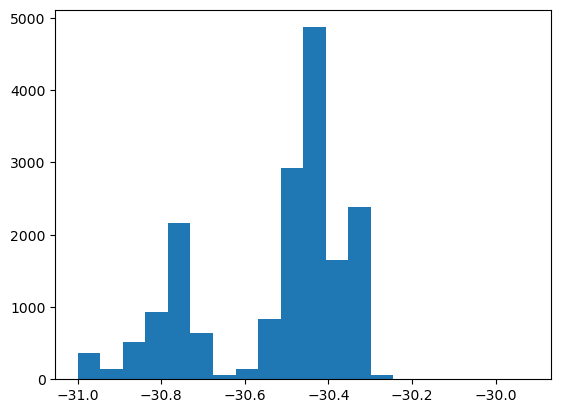

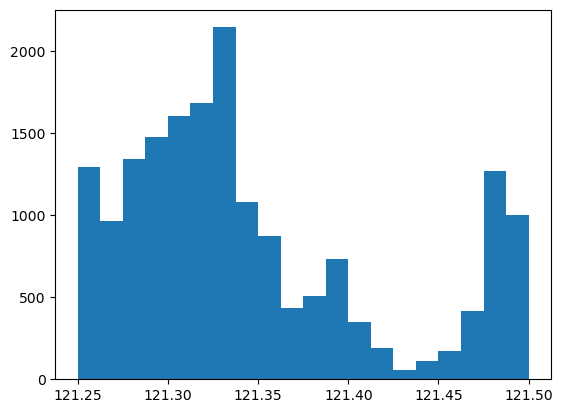

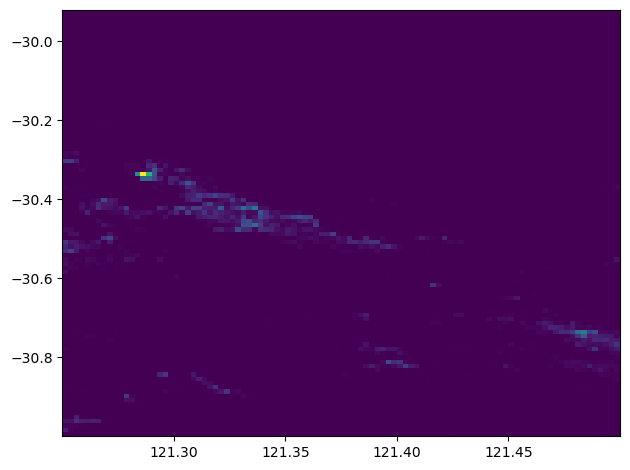

In [7]:
import matplotlib.pyplot as plt
print(MineLabels.shape)
MineLabels2 = MineLabels.dropna(subset=['Latitude','Longitude'])
print(MineLabels2.shape)
MineLabels2 =MineLabels2[(MineLabels2['Latitude'] <= -29.5) &(MineLabels2['Latitude'] >= -31) & (MineLabels2['Longitude'] >=121.25)& (MineLabels2['Longitude'] <=121.5)  ]
plt.scatter(MineLabels2['Longitude'],MineLabels2['Latitude'],marker=".")
plt.show()
plt.hist(MineLabels2['Latitude'], bins = 20)
plt.show()
plt.hist(MineLabels2['Longitude'],bins = 20)
plt.show()
fig, ax = plt.subplots(tight_layout=True)
hist = ax.hist2d(MineLabels2['Longitude'],MineLabels2['Latitude'],bins=100)

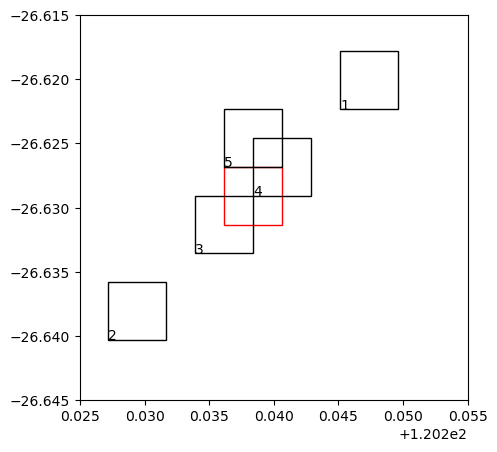

In [16]:
from matplotlib.patches import Rectangle

#define Matplotlib figure and axis
fig, ax = plt.subplots()
fig.set_size_inches(5,5)
ax.set_ylim(-26.645, -26.615)
ax.set_xlim(120.225, 120.255)

#create simple line plot
# ax.plot([-26.60, 120.2],[-26.20, 120.6])

#add rectangle to plot
ax.add_patch(Rectangle((120.23613046530,-26.63132578990), 0.004498870783433358, 0.004498870783433358,color = 'r',fill=False))
ax.add_patch(Rectangle((120.24512820687,-26.62232804833), 0.004498870783433358, 0.004498870783433358,fill=False))
ax.annotate(1,(120.24512820687,-26.62232804833))
ax.add_patch(Rectangle((120.22713272373,-26.64032353147), 0.004498870783433358, 0.004498870783433358,fill=False))
ax.annotate(2,(120.22713272373,-26.64032353147))
ax.add_patch(Rectangle((120.23388102991,-26.63357522529), 0.004498870783433358, 0.004498870783433358,fill=False))
ax.annotate(3,(120.23388102991,-26.63357522529))
ax.add_patch(Rectangle((120.23837990069,-26.62907635451), 0.004498870783433358, 0.004498870783433358,fill=False))
ax.annotate(4,(120.23837990069,-26.62907635451))
ax.add_patch(Rectangle((120.23613046530,-26.62682691910), 0.004498870783433358, 0.004498870783433358,fill=False))
ax.annotate(5,(120.23613046530,-26.62682691910))
# ax.add_patch(Rectangle((-26.63132578990,120.23613046530), 0.004498870783433358, 0.004498870783433358,fill=False))

#display plot
plt.show()

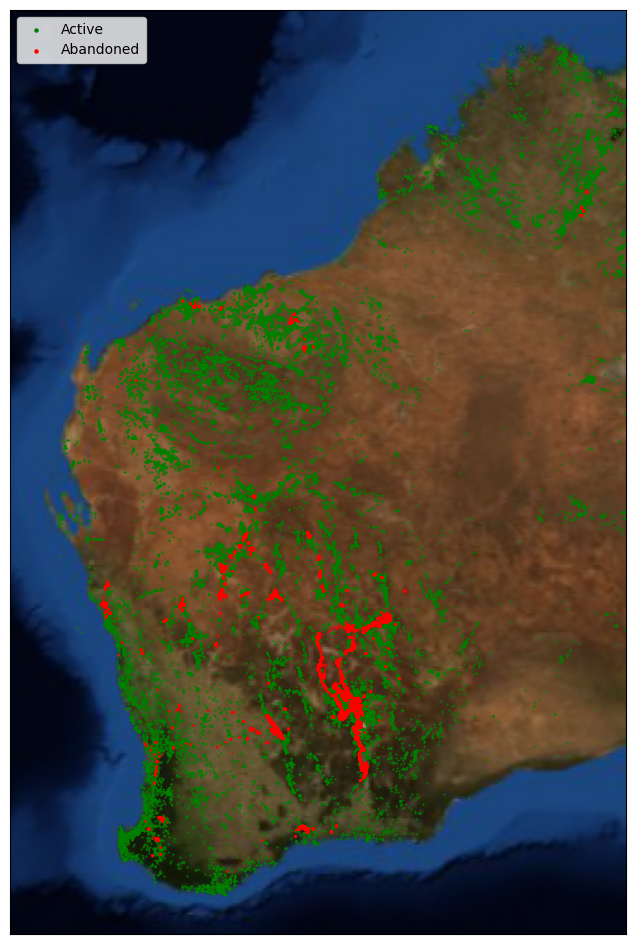

In [ ]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon

plt.figure(figsize=(20,12))
m = Basemap(projection='merc',
              llcrnrlat=-36,urcrnrlat=-13,
              llcrnrlon=112,urcrnrlon=129,resolution='l')

m.bluemarble()
x, y = m(MineLabels[MineLabels['Stage2']=='Active']['Longitude'],MineLabels[MineLabels['Stage2']=='Active']['Latitude'])
m.scatter(x,y,marker = '.',color='g',s=1)
x, y = m(MineLabels[MineLabels['Stage2']=='Abandoned']['Longitude'],MineLabels[MineLabels['Stage2']=='Abandoned']['Latitude'])
m.scatter(x,y,marker = '.',color='r',s=1)

# x1,y1 = map(118,-31)
# x2,y2 = map(118,-21)
# x3,y3 = map(128,-21)
# x4,y4 = map(128,-31)
# poly = Polygon([(x1,y1),(x2,y2),(x3,y3),(x4,y4)],facecolor='red',edgecolor='green',linewidth=3)
# plt.gca().add_patch(poly)


leg = plt.legend(['Active','Abandoned'],loc="upper left")
leg.legend_handles[0]._sizes = [20]
leg.legend_handles[1]._sizes = [20]

plt.savefig('/MinesMap.png')
plt.show()